#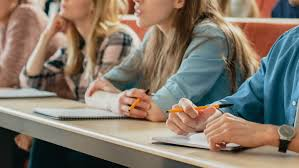Problem Statement:
Analyze the impact of personal and socio-economic factors on students' test scores in three subjects at a fictional public school, identifying interaction effects among these factors.

In [44]:
#import necessary libraray
#Data Manipulation
import pandas as pd
#Numerical Computation
import numpy as np
#Visualization
import matplotlib.pyplot as plt
#Advance Visualization
import seaborn as sns

In [45]:
#load data
df=pd.read_csv('/content/drive/MyDrive/Expanded_data_with_more_features.csv')
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [46]:
#Chcek Data Types & Null Values in Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [47]:
#Describe all numerical values with mean,std,min,max.
df.describe()
#MathScore is observed to be lower on average compared to Reading and Writing scores.

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [48]:
#Check Null Values
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [49]:
#Drop unnecessary column which is not significant for Dataset
df.drop("Unnamed: 0",axis=1)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [50]:
#Data or column transform
df['WklyStudyHours']=df['WklyStudyHours'].str.replace('original','new')
#weekly hours is data in good format change values


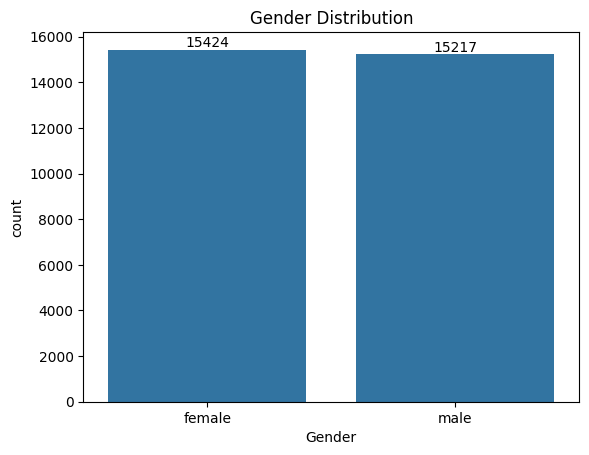

In [51]:
#gender distribution
ax=sns.countplot(x='Gender',data=df)
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()
#There are more female students than male students

In [52]:
#Chcek parent Education with Mathscore,ReadingScore,WritingScore
gb=df.groupby("ParentEduc").agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb
#Higher parental education levels are associated with higher average test scores in all three subjects.

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


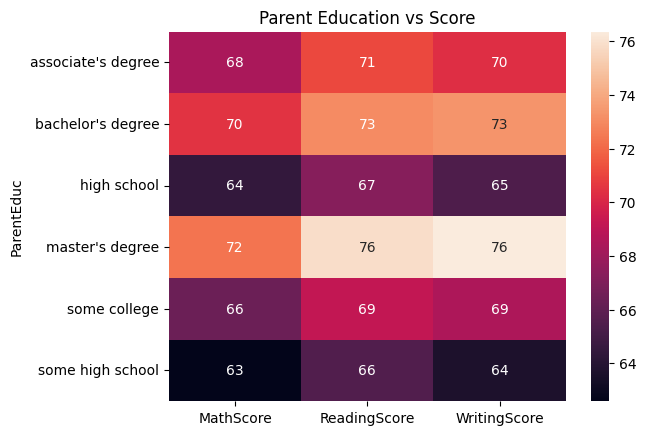

In [53]:
sns.heatmap(gb,annot=True)
plt.title("Parent Education vs Score")
plt.show()
#in above chart analysed that the education of parent is good impact on their childrens marks

In [54]:
#chk lunch type is effect on score
gb1=df.groupby("LunchType").agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
gb1
#Students who receive standard lunch (as opposed to free/reduced lunch) tend to have higher average test scores.

,MathScore,ReadingScore,WritingScore
LunchType,,,
free/reduced,58.862332,64.189735,62.650522
standard,70.709370,72.175634,71.529716


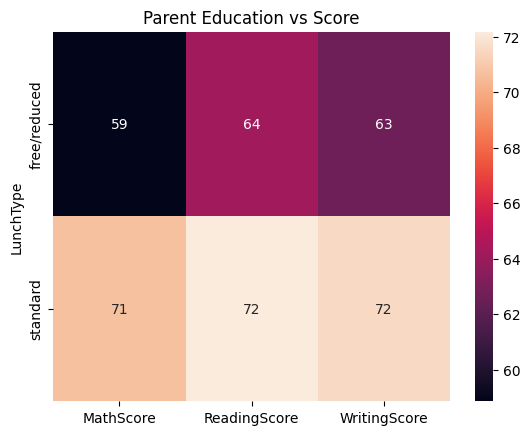

In [55]:
sns.heatmap(gb1,annot=True)
plt.title("Lunch Type vs Score")
plt.show()
#student lunch type impact on score of student

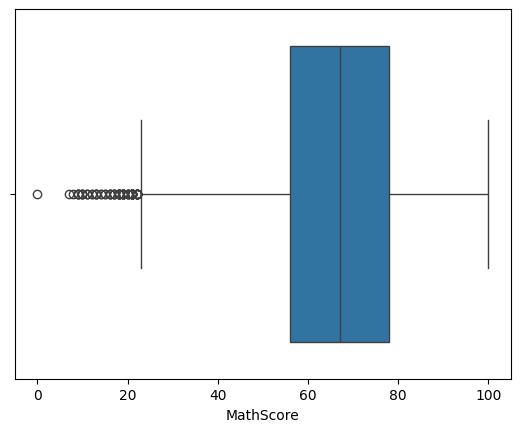

In [56]:
#chk outliers
sns.boxplot(x="MathScore",data=df)
plt.show()

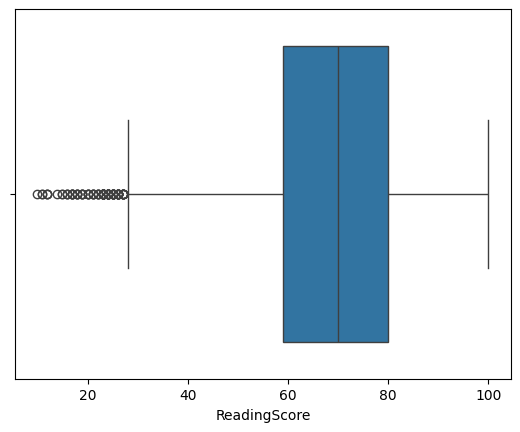

In [57]:
#chk outliers
sns.boxplot(x="ReadingScore",data=df)
plt.show()

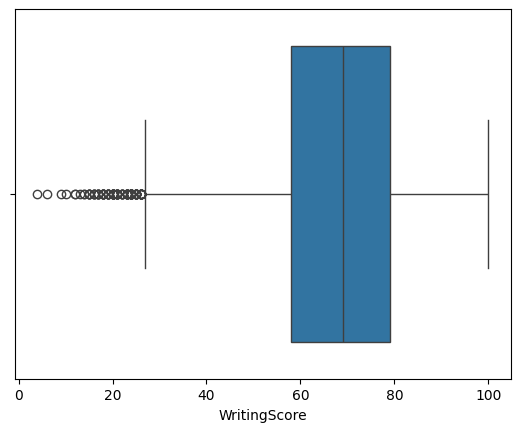

In [58]:
#chk outliers
sns.boxplot(x="WritingScore",data=df)
plt.show()
#Box plots show the presence of outliers in all three test score distributions, indicating variability in student performance.

In [59]:
df['EthnicGroup'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [60]:
#distribution of ethnic group
groupA=df.loc[(df['EthnicGroup']=='group A')].count()
groupA

Unnamed: 0             2219
Gender                 2219
EthnicGroup            2219
ParentEduc             2078
LunchType              2219
TestPrep               2081
ParentMaritalStatus    2121
PracticeSport          2167
IsFirstChild           2168
NrSiblings             2096
TransportMeans         1999
WklyStudyHours         2146
MathScore              2219
ReadingScore           2219
WritingScore           2219
dtype: int64

In [61]:
#distribution of ethnic group
groupB=df.loc[(df['EthnicGroup']=='group B')].count()
groupB

Unnamed: 0             5826
Gender                 5826
EthnicGroup            5826
ParentEduc             5470
LunchType              5826
TestPrep               5488
ParentMaritalStatus    5605
PracticeSport          5704
IsFirstChild           5649
NrSiblings             5546
TransportMeans         5238
WklyStudyHours         5642
MathScore              5826
ReadingScore           5826
WritingScore           5826
dtype: int64

In [62]:
groupC=df.loc[(df['EthnicGroup']=='group C')].count()
groupC

Unnamed: 0             9212
Gender                 9212
EthnicGroup            9212
ParentEduc             8652
LunchType              9212
TestPrep               8652
ParentMaritalStatus    8858
PracticeSport          9050
IsFirstChild           8929
NrSiblings             8763
TransportMeans         8280
WklyStudyHours         8933
MathScore              9212
ReadingScore           9212
WritingScore           9212
dtype: int64

In [63]:
groupD=df.loc[(df['EthnicGroup']=="group D")].count()
groupD

Unnamed: 0             7503
Gender                 7503
EthnicGroup            7503
ParentEduc             7056
LunchType              7503
TestPrep               7070
ParentMaritalStatus    7218
PracticeSport          7343
IsFirstChild           7285
NrSiblings             7106
TransportMeans         6713
WklyStudyHours         7270
MathScore              7503
ReadingScore           7503
WritingScore           7503
dtype: int64

In [64]:
groupE=df.loc[(df['EthnicGroup']=='group E')].count()
groupE

Unnamed: 0             4041
Gender                 4041
EthnicGroup            4041
ParentEduc             3814
LunchType              4041
TestPrep               3804
ParentMaritalStatus    3892
PracticeSport          3954
IsFirstChild           3918
NrSiblings             3820
TransportMeans         3624
WklyStudyHours         3924
MathScore              4041
ReadingScore           4041
WritingScore           4041
dtype: int64

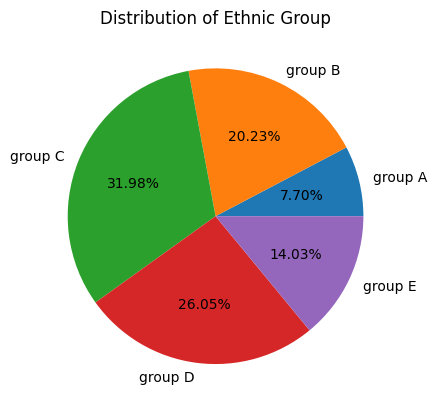

In [65]:
mlist=[groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]
l=["group A","group B",'group C','group D',"group E"]
plt.pie(mlist,labels=l,autopct="%1.2f%%")
plt.title("Distribution of Ethnic Group")
plt.show()

Overall, the analysis suggests that socio-economic factors such as parental education and lunch type significantly impact student test scores, with additional variability introduced by ethnic group distributions.